This notebook is sectioned by heading. There is a 'Tyler' section and a 'David' section. If we put our stuff in only our own section, we should be able to work on the same notebook with no issues.

Things to investigate:

- How many investments are by doctors who have multiple investments? (Tyler, done)

- Which states / zip codes are associated with the most investments? Does affluence of business zipcode correlate with doctor investment? (David, in progress)

- Which doctors have invested the most money? In the most companies?

- Which investments were made during or prior to 2015? What is the total sum of these different groups of investments?

- Which businesses hold the most investments from doctors? Are they geographically close to each other?

In [1]:
# library imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import locale # money formatting

In [2]:
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [3]:
#     GNRL is 6 gigabytes - too big
# record_general = pd.read_csv('data/OP_DTL_GNRL_PGYR2015_P01172017.csv')
#     RSRCH has hundred of bad columns - not good for class
# record_research = pd.read_csv('data/OP_DTL_RSRCH_PGYR2015_P01172017.csv')
#     REMOVED has very little data, so we're ignoring it for now
# record_removed = pd.read_csv('data/OP_REMOVED_DELETED_PGYR2015_P01172017.csv')

In [4]:
record_ownership = pd.read_csv('data/OP_DTL_OWNRSHP_PGYR2015_P01172017.csv')
record_ownership.shape

IOError: File data/OP_DTL_OWNRSHP_PGYR2015_P01172017.csv does not exist

In [ ]:
record_ownership.head()

## Tyler: How many investments are by doctors who have multiple investments?

In [ ]:
doctors = pd.DataFrame([])
doctors['ID'] = record_ownership['Physician_Profile_ID']
doctors['First_Name'] = record_ownership['Physician_First_Name']
doctors['Middle_Name'] = record_ownership['Physician_Middle_Name']
doctors['Last_Name'] = record_ownership['Physician_Last_Name']

doctors.shape

In [ ]:
doctors.head()

In [ ]:
# sort by IDs (unneccessary)
doctors_sorted = doctors.sort_values('ID')
doctors_sorted.head()

In [ ]:
# count the unique IDs
uniq = len(doctors.ID.unique())
total = doctors.shape[0]

print str(uniq) + " unique physicians in data set of " + str(total) + " observations."
print str(total - uniq) + " observations are associated with physicians with 2 or more investments."

## Tyler: Which doctors have invested the most money? In the most companies?

In [ ]:
# get a view of the data we want
temp = record_ownership[["Physician_Profile_ID",
                         "Physician_First_Name",
                         "Physician_Middle_Name",
                         "Physician_Last_Name",
                         "Total_Amount_Invested_USDollars",
                         "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
                         "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"]]


# build the dataframe out of that view
doc_invest = pd.DataFrame(temp, copy=True)
doc_invest = doc_invest.rename(columns={"Physician_Profile_ID":"Physician_ID",
                                        "Total_Amount_Invested_USDollars":"Total_Invesment",
                                        "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID":"Company_ID",
                                        "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name":"Company_Name"})

doc_invest = doc_invest.astype({"Physician_ID":"string",
                                "Physician_First_Name":"string",
                                "Physician_Middle_Name":"string",
                                "Physician_Last_Name":"string",
                                "Company_ID":"string",
                                "Company_Name":"string"})

#doc_invest.head()
doc_invest.dtypes

In [6]:
# Dictionary to hold the doctor:total_investment data
investments = {}

for doctor in doc_invest["Physician_ID"].unique():
    investments[doctor] = np.sum(doc_invest["Total_Invesment"].where(doc_invest["Physician_ID"] == doctor))

len(investments)
#investments.items()[:10]

3870

This matches our observation above: 3870 unique physicians in data set of 4319 observations. Which of these 3870 doctors holds the greatest total investments?

In [7]:
doc_invest.head()

,Physician_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Total_Invesment,Company_ID,Company_Name
0,333118,Kelvin,nan,Higa,2500.00,100000010963,"Endogastric Solutions, Inc"
1,270405,Spencer,nan,Holover,24999.69,100000010963,"Endogastric Solutions, Inc"
2,4927,Shawn,nan,Garber,99998.74,100000010963,"Endogastric Solutions, Inc"
3,132587,Yu-Guang,nan,He,10000.00,100000005370,"Vital Art and Science, LLC"
4,885629,Allan,nan,Deutsch,1548787.00,100000005369,ESSENTIAL DENTAL SYSTEMS INCORPORATED


In [8]:
# sort the docs
sorted_docs = sorted(investments.items(), # (doctor_id, value)
                     key=lambda x: x[1],  # sort on value
                     reverse=True)        # biggest to smallest

#print sorted_docs[:10]

# grab the doctor names via the ID
for doc, total in sorted_docs[:10]:
    #print "doctor: " + str(doc) + "\t\tinvested " + str(total)
    just_doc = doc_invest[doc_invest["Physician_ID"] == doc].head(1)
    
    doc_f = just_doc.get("Physician_First_Name").values[0]
    doc_m = just_doc.get("Physician_Middle_Name").values[0]
    doc_l = just_doc.get("Physician_Last_Name").values[0]
    
    if doc_m == "nan":
        doc_m = ""
    
    name = str(doc_f) + " " + str(doc_m) + " " + str(doc_l)
    id_n = "ID: " + str(doc).ljust(10)
    inv  = "has invested " + locale.currency(total, grouping = True)
    
    out_str = name.ljust(20) + id_n + inv
    print out_str

George  Lopez       ID: 1315076   has invested $199,733,425.11
Richard  Sherman    ID: 661336    has invested $10,714,540.75
Robert  Swinney     ID: 544922    has invested $6,295,918.17
John  Steinmann     ID: 355094    has invested $5,719,872.54
ARNOLD M SCHWARTZ   ID: 142810    has invested $4,808,777.18
Nicholas  Lembo     ID: 281680    has invested $3,740,111.98
FRANK  CAMMISA      ID: 329721    has invested $3,082,015.00
Michael  Hartman    ID: 122142    has invested $2,811,717.25
Michael  Kovalchik  ID: 622837    has invested $2,658,254.57
JOHN  THALGOTT      ID: 350823    has invested $2,411,752.00


We can see that the doctor wth the most investments is George Lopez, with nearly \$200mm total investments. Let's now plot a histogram of the total investments, and see how far away from the mean he is.

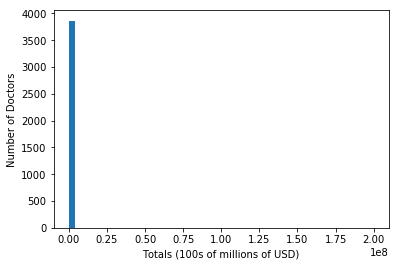

In [66]:
invs = []

for d, i in sorted_docs:
    invs.append(i)

sr = pd.Series(invs)

# Produce a histogram of the invesment totals
plt.figure()
plt.hist(sr, bins=50)
plt.xlabel("Totals (100s of millions of USD)")
plt.ylabel("Number of Doctors")
plt.show()

What a histogram. In spite of how it looks, there are actual several bins with members. An overwhelming number of doctors have a low total investment, therefore we can just barely see a couple pixel-sized bins to the right of the tall one. Additionally, there is an outlier way to the right, with nearly \$200mm USD of investment.

Let's try a log scale histogram, and see if it is more readable.

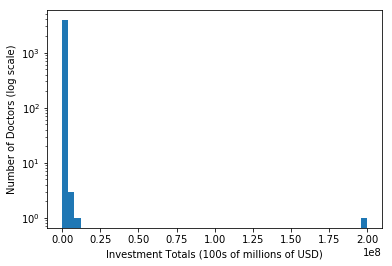

In [56]:
plt.figure()
plt.hist(sr, bins=50, log=True)
plt.xlabel("Investment Totals (100s of millions of USD)")
plt.ylabel("Number of Doctors (log scale)")
plt.show()

We can now clearly see the distribution of investment totals. The majority of investments are less than \$1mm, a few investments approach the \$10mm range, and there is a massive outlier near \$200mm.